In [4]:
import os
import shutil
import random
import tempfile
import numpy as np
import gc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# CONFIG
base_dir = "projectdata/images/100_stratified4fold_1000per_seed3888"
quadrants = ["Q1", "Q2", "Q3", "Q4"]
img_size = (299, 299)  # InceptionV3 requires 299x299 input size
batch_size = 32
epochs = 30

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set GPU memory growth
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Found {len(gpus)} GPU devices and enabled memory growth")
    except RuntimeError as e:
        print(f"GPU setup error: {e}")
        

SEED = 3888
def set_seed(seed=3888):
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
set_seed(SEED)

Found 1 GPU devices and enabled memory growth



=== Fold 1: Testing on Q1 ===
Found 3196 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.
Epoch 1/30
100/100 [==============================] - 55s 521ms/step - loss: 0.5599 - accuracy: 0.7434 - val_loss: 0.4050 - val_accuracy: 0.8152
Epoch 2/30
100/100 [==============================] - 51s 509ms/step - loss: 0.4641 - accuracy: 0.7960 - val_loss: 0.4136 - val_accuracy: 0.8086
Epoch 3/30
100/100 [==============================] - 52s 518ms/step - loss: 0.4347 - accuracy: 0.8094 - val_loss: 0.3852 - val_accuracy: 0.8200
Epoch 4/30
100/100 [==============================] - 51s 511ms/step - loss: 0.4383 - accuracy: 0.8066 - val_loss: 0.3861 - val_accuracy: 0.8343
Epoch 5/30
100/100 [==============================] - 53s 527ms/step - loss: 0.4333 - accuracy: 0.8110 - val_loss: 0.3846 - val_accuracy: 0.8314
Epoch 6/30
100/100 [==============================] - 51s 505ms/step - loss: 0.4296 - accuracy: 0.8120 - val_loss: 0.3887 - val_accuracy: 0.8057
Epoch 7/30
100/

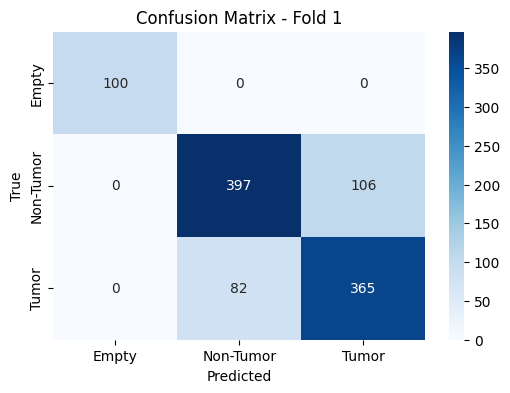

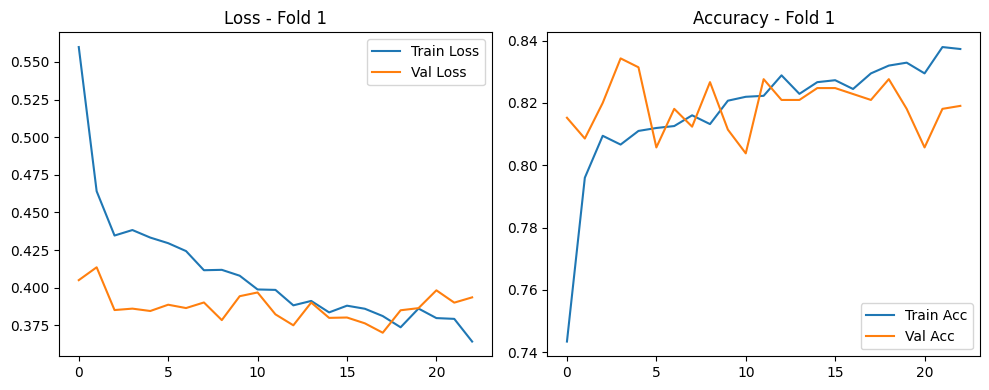


=== Fold 2: Testing on Q2 ===
Found 3256 images belonging to 3 classes.
Found 990 images belonging to 3 classes.
Epoch 1/30
102/102 [==============================] - 55s 519ms/step - loss: 0.5983 - accuracy: 0.7445 - val_loss: 0.3912 - val_accuracy: 0.8354
Epoch 2/30
102/102 [==============================] - 53s 515ms/step - loss: 0.4561 - accuracy: 0.8031 - val_loss: 0.3807 - val_accuracy: 0.8364
Epoch 3/30
102/102 [==============================] - 52s 515ms/step - loss: 0.4552 - accuracy: 0.8050 - val_loss: 0.3991 - val_accuracy: 0.8303
Epoch 4/30
102/102 [==============================] - 53s 519ms/step - loss: 0.4345 - accuracy: 0.8136 - val_loss: 0.3872 - val_accuracy: 0.8424
Epoch 5/30
102/102 [==============================] - 52s 513ms/step - loss: 0.4362 - accuracy: 0.8068 - val_loss: 0.3778 - val_accuracy: 0.8465
Epoch 6/30
102/102 [==============================] - 52s 513ms/step - loss: 0.4300 - accuracy: 0.8093 - val_loss: 0.3790 - val_accuracy: 0.8424
Epoch 7/30
102/1

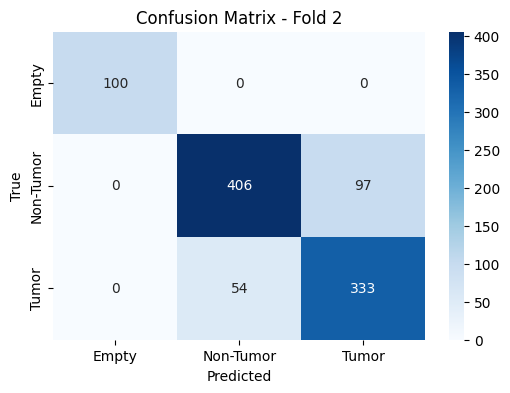

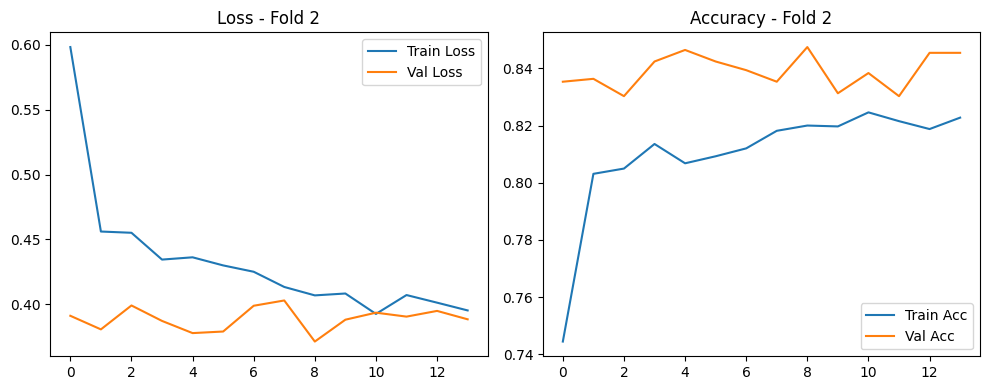


=== Fold 3: Testing on Q3 ===
Found 3143 images belonging to 3 classes.
Found 1103 images belonging to 3 classes.
Epoch 1/30
99/99 [==============================] - 55s 534ms/step - loss: 0.5294 - accuracy: 0.7881 - val_loss: 0.5370 - val_accuracy: 0.7398
Epoch 2/30
99/99 [==============================] - 52s 523ms/step - loss: 0.4342 - accuracy: 0.8180 - val_loss: 0.5300 - val_accuracy: 0.7507
Epoch 3/30
99/99 [==============================] - 51s 514ms/step - loss: 0.4248 - accuracy: 0.8228 - val_loss: 0.5138 - val_accuracy: 0.7443
Epoch 4/30
99/99 [==============================] - 51s 520ms/step - loss: 0.4074 - accuracy: 0.8247 - val_loss: 0.4919 - val_accuracy: 0.7516
Epoch 5/30
99/99 [==============================] - 52s 523ms/step - loss: 0.3918 - accuracy: 0.8323 - val_loss: 0.5079 - val_accuracy: 0.7607
Epoch 6/30
99/99 [==============================] - 51s 512ms/step - loss: 0.3945 - accuracy: 0.8320 - val_loss: 0.4945 - val_accuracy: 0.7434
Epoch 7/30
99/99 [=========

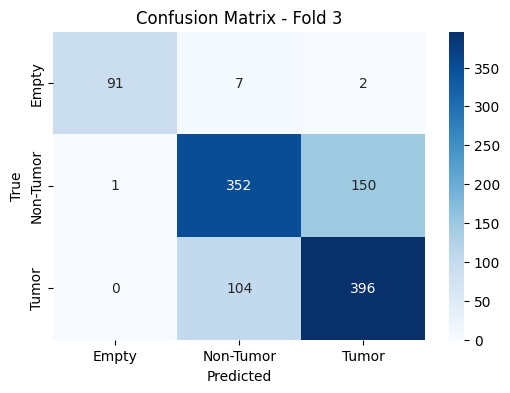

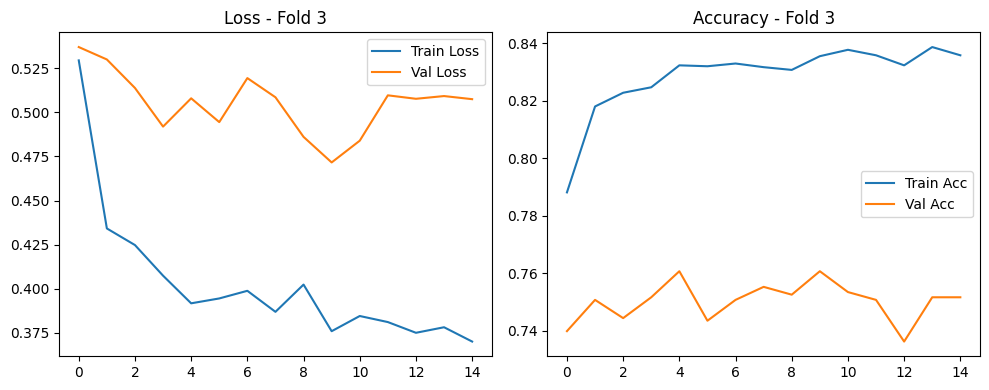


=== Fold 4: Testing on Q4 ===
Found 3143 images belonging to 3 classes.
Found 1103 images belonging to 3 classes.
Epoch 1/30
99/99 [==============================] - 54s 527ms/step - loss: 0.5306 - accuracy: 0.7655 - val_loss: 0.5271 - val_accuracy: 0.8051
Epoch 2/30
99/99 [==============================] - 51s 517ms/step - loss: 0.4354 - accuracy: 0.8062 - val_loss: 0.5712 - val_accuracy: 0.7815
Epoch 3/30
99/99 [==============================] - 51s 511ms/step - loss: 0.4057 - accuracy: 0.8116 - val_loss: 0.5356 - val_accuracy: 0.8051
Epoch 4/30
99/99 [==============================] - 50s 510ms/step - loss: 0.4078 - accuracy: 0.8167 - val_loss: 0.6084 - val_accuracy: 0.7906
Epoch 5/30
99/99 [==============================] - 50s 509ms/step - loss: 0.3926 - accuracy: 0.8212 - val_loss: 0.5964 - val_accuracy: 0.7987
Epoch 6/30
35/35 [==============================] - 6s 157ms/step
Classification Report for Fold 4:
              precision    recall  f1-score   support

       Empty   

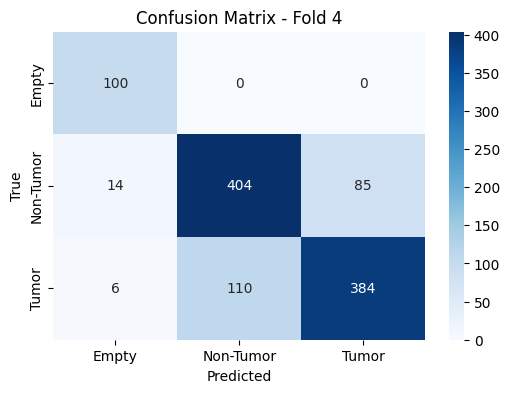

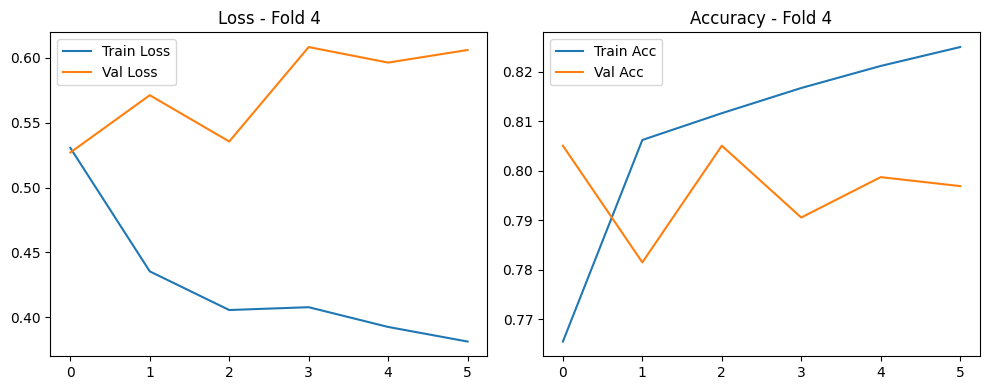


Best model saved as 'best_model_InceptionV3.h5'

=== Final Cross-Validation Accuracy: 0.8119 ===

Average Classification Accuracy per Fold:
   accuracy
0  0.820952
1  0.847475
2  0.760653
3  0.805077


In [5]:

# Image Generators
set_seed(SEED)
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=10, zoom_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

# Merge training folders for each fold
def merge_training_dirs(train_dirs):
    temp_dir = tempfile.mkdtemp()
    class_names = ['Empty', 'Non-Tumor', 'Tumor']
    for class_name in class_names:
        os.makedirs(os.path.join(temp_dir, class_name), exist_ok=True)
    for train_dir in train_dirs:
        for class_name in class_names:
            src_dir = os.path.join(train_dir, class_name)
            dst_dir = os.path.join(temp_dir, class_name)
            for file in os.listdir(src_dir):
                shutil.copy(os.path.join(src_dir, file), dst_dir)
    return temp_dir

# Build the CNN model using InceptionV3
def build_model():
    K.clear_session()
    set_seed(SEED)
    
    base = InceptionV3(include_top=False, input_shape=(*img_size, 3), weights='imagenet')
    base.trainable = False  # Freeze base layers

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(3, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# For collecting fold metrics
all_histories = []
all_reports = []
best_val_loss = float('inf')  # Initialize with an infinitely large number
best_model = None  # To keep track of the best model

for i, test_fold in enumerate(quadrants):
    set_seed(SEED)
    print(f"\n=== Fold {i+1}: Testing on {test_fold} ===")
    train_folds = [q for q in quadrants if q != test_fold]
    train_dirs = [os.path.join(base_dir, fold) for fold in train_folds]
    valid_dir = os.path.join(base_dir, test_fold)

    merged_train_dir = merge_training_dirs(train_dirs)

    train_generator = train_datagen.flow_from_directory(
        merged_train_dir, target_size=img_size, batch_size=batch_size,
        class_mode='categorical'
    )

    val_generator = test_datagen.flow_from_directory(
        valid_dir, target_size=img_size, batch_size=batch_size,
        class_mode='categorical', shuffle=False
    )

    model = build_model()

    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
        ModelCheckpoint(f'inceptionV3_Tanvi_fold_{i+1}.h5', save_best_only=True, monitor='val_loss')
    ]

    history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=callbacks)
    all_histories.append(history.history)

    # Predict and evaluate
    val_preds = model.predict(val_generator)
    y_pred = np.argmax(val_preds, axis=1)
    y_true = val_generator.classes
    class_labels = list(val_generator.class_indices.keys())

    print(f"Classification Report for Fold {i+1}:")
    report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
    all_reports.append(report)
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Save the best model after each fold (check for better validation loss)
    fold_val_loss = min(history.history['val_loss'])
    if fold_val_loss < best_val_loss:
        best_val_loss = fold_val_loss
        best_model = model

    # Plot Loss/Accuracy
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss - Fold {i+1}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'Accuracy - Fold {i+1}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    K.clear_session()
    gc.collect()
    
# Save the best model after cross-validation
if best_model:
    best_model.save('best_model_InceptionV3.h5')
    print("\nBest model saved as 'best_model_InceptionV3.h5'")

# Average metrics over folds
avg_accuracy = np.mean([max(hist['val_accuracy']) for hist in all_histories])
print(f"\n=== Final Cross-Validation Accuracy: {avg_accuracy:.4f} ===")

# (Optional) Average classification report
import pandas as pd
df_reports = pd.DataFrame([r['accuracy'] for r in all_reports], columns=['accuracy'])
print("\nAverage Classification Accuracy per Fold:")
print(df_reports)


Found 4060 images belonging to 3 classes.
Found 452 images belonging to 3 classes.
Epoch 1/30
127/127 [==============================] - 2841s 22s/step - loss: 0.6818 - accuracy: 0.7187 - val_loss: 0.5021 - val_accuracy: 0.7965
Epoch 2/30
127/127 [==============================] - 676s 5s/step - loss: 0.6139 - accuracy: 0.7480 - val_loss: 0.5028 - val_accuracy: 0.8031
Epoch 3/30
127/127 [==============================] - 682s 5s/step - loss: 0.6000 - accuracy: 0.7574 - val_loss: 0.5136 - val_accuracy: 0.8009
Epoch 4/30
127/127 [==============================] - 685s 5s/step - loss: 0.5897 - accuracy: 0.7616 - val_loss: 0.5111 - val_accuracy: 0.7898
Epoch 5/30
127/127 [==============================] - 683s 5s/step - loss: 0.5720 - accuracy: 0.7717 - val_loss: 0.4983 - val_accuracy: 0.8119
Epoch 6/30
127/127 [==============================] - 1707s 14s/step - loss: 0.5806 - accuracy: 0.7601 - val_loss: 0.4948 - val_accuracy: 0.8075
Epoch 7/30
127/127 [==============================] - 6

/Users/tanvibangar/.virtualenvs/r-tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



✅ Final model saved as 'final_model_InceptionV3.h5'


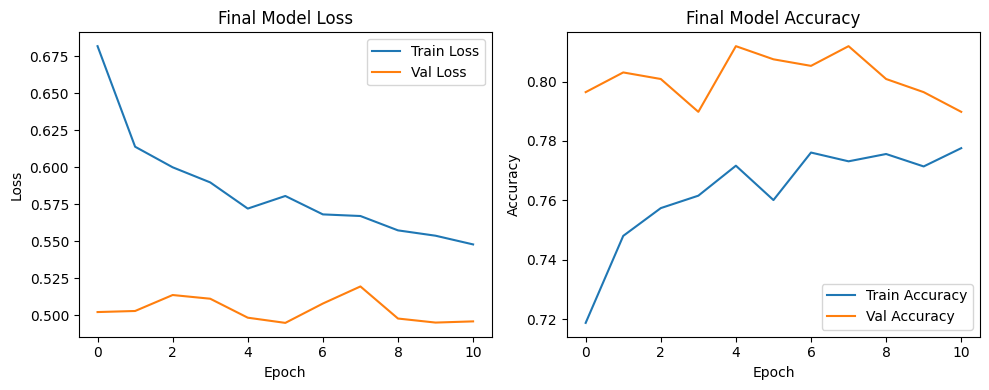

15/15 [==============================] - 71s 5s/step - loss: 0.4948 - accuracy: 0.8075

🧪 Final Model - Validation Loss: 0.4948, Accuracy: 0.8075


In [2]:
import os
import shutil
import tempfile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# === STEP 1: Leave out 10% from each quadrant for final validation ===

def split_data_for_final_training(quadrants, base_dir, split_ratio=0.1):
    temp_train = tempfile.mkdtemp()
    temp_val = tempfile.mkdtemp()
    class_names = ['Empty', 'Non-Tumor', 'Tumor']

    for class_name in class_names:
        os.makedirs(os.path.join(temp_train, class_name), exist_ok=True)
        os.makedirs(os.path.join(temp_val, class_name), exist_ok=True)

    for q in quadrants:
        for class_name in class_names:
            src_dir = os.path.join(base_dir, q, class_name)
            all_files = os.listdir(src_dir)
            train_files, val_files = train_test_split(all_files, test_size=split_ratio, random_state=42)
            for f in train_files:
                shutil.copy(os.path.join(src_dir, f), os.path.join(temp_train, class_name))
            for f in val_files:
                shutil.copy(os.path.join(src_dir, f), os.path.join(temp_val, class_name))

    return temp_train, temp_val

# Define quadrants and base_dir if not already done
# quadrants = ['Q1', 'Q2', 'Q3', 'Q4']
# base_dir = '/mnt/data/prepared_data_quadrant'  # Change if different

# Split data
final_train_dir, final_val_dir = split_data_for_final_training(quadrants, base_dir)

# === STEP 2: Set up data generators ===

final_train_generator = train_datagen.flow_from_directory(
    final_train_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical'
)

final_val_generator = test_datagen.flow_from_directory(
    final_val_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', shuffle=False
)

# === STEP 3: Train final model on 90% data ===

final_model = build_model()  # Reuse your existing build_model() function
final_callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss')
]

final_history = final_model.fit(
    final_train_generator,
    epochs=epochs,
    validation_data=final_val_generator,
    callbacks=final_callbacks
)

# Save the model
final_model.save('final_model_InceptionV3.h5')
print("\n✅ Final model saved as 'final_model_InceptionV3.h5'")

# === STEP 4: Plot Loss & Accuracy ===

plt.figure(figsize=(10, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(final_history.history['loss'], label='Train Loss')
plt.plot(final_history.history['val_loss'], label='Val Loss')
plt.title('Final Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(final_history.history['accuracy'], label='Train Accuracy')
plt.plot(final_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Final Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# === STEP 5: Print final loss and accuracy on validation set ===

loss, accuracy = final_model.evaluate(final_val_generator)
print(f"\n🧪 Final Model - Validation Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


15/15 [==============================] - 73s 5s/step

🧾 Classification Report:
              precision    recall  f1-score   support

       Empty       0.92      0.69      0.79        52
   Non-Tumor       0.76      0.84      0.80       200
       Tumor       0.83      0.81      0.82       200

    accuracy                           0.81       452
   macro avg       0.84      0.78      0.80       452
weighted avg       0.81      0.81      0.81       452



<Figure size 600x500 with 0 Axes>

/Users/tanvibangar/.virtualenvs/r-tensorflow/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


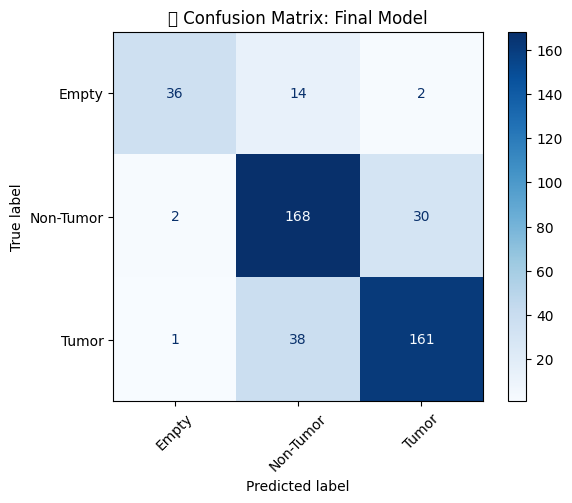

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# === STEP 6: Generate Predictions ===

val_preds = final_model.predict(final_val_generator)
y_pred = np.argmax(val_preds, axis=1)
y_true = final_val_generator.classes
class_labels = list(final_val_generator.class_indices.keys())

# === STEP 7: Classification Report ===

print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# === STEP 8: Confusion Matrix ===

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("📊 Confusion Matrix: Final Model")
plt.show()
